# **Trabalho Final - Data Science em Marketing**
**Nome:** Tales Pinho  
**Curso:** Data Science Marketing  
**Professor:** Sérgio Assunção Monteiro

## **Passo 1: Importação das Bibliotecas**

In [1]:
# Importação de bibliotecas necessárias
import pandas as pd
# Importação de bibliotecas necessárias
import numpy as np
# Importação de bibliotecas necessárias
import matplotlib.pyplot as plt
# Importação de bibliotecas necessárias
import seaborn as sns
# Importação de bibliotecas necessárias
from sklearn.cluster import KMeans
# Importação de bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
# Importação de bibliotecas necessárias
from sklearn.linear_model import LinearRegression
# Importação de bibliotecas necessárias
from sklearn.model_selection import train_test_split
# Importação de bibliotecas necessárias
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")

## **Passo 2: Leitura dos Dados**

In [2]:
# Leitura dos dados a partir de arquivos CSV
clientes = pd.read_csv('/content/clientes.csv')
# Leitura dos dados a partir de arquivos CSV
transacoes = pd.read_csv('/content/transacoes.csv')
# Leitura dos dados a partir de arquivos CSV
campanhas = pd.read_csv('/content/campanhas.csv')
clientes.head()

,cliente_id,idade,renda_mensal,cidade,tipo_cliente,ultima_compra,frequencia_compras,total_gasto
0,1,56,2590,Curitiba,ocasional,63,12,6779
1,2,69,5305,Manaus,frequente,104,4,7310
2,3,46,3865,Porto Alegre,frequente,339,8,4170
3,4,32,2866,Porto Alegre,ocasional,359,7,4619
4,5,60,4030,Porto Alegre,premium,156,7,3869


## **Passo 3: Análise de Cluster**

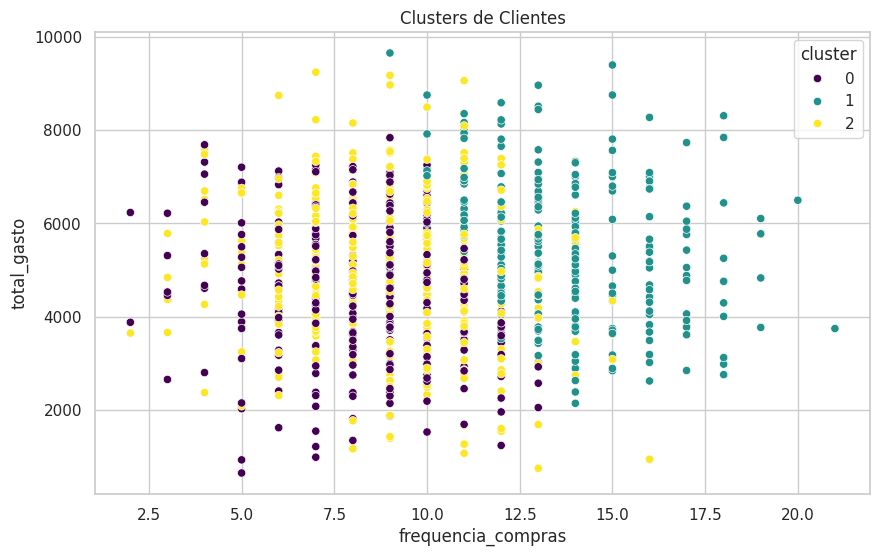

,frequencia_compras,total_gasto,ultima_compra
cluster,,,
0,8.253918,4498.263323,88.216301
1,13.821429,5526.250000,148.472222
2,9.023310,4936.333333,275.937063


In [3]:
colunas = ['frequencia_compras', 'total_gasto', 'ultima_compra']
X = clientes[colunas]
# Normalização dos dados antes da clusterização
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
# Realização de previsões com o modelo treinado
clientes['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10,6))
# Visualização gráfica dos clusters
sns.scatterplot(data=clientes, x='frequencia_compras', y='total_gasto', hue='cluster', palette='viridis')
plt.title('Clusters de Clientes')
plt.show()

# Cálculo de médias agrupadas por cluster ou categoria
clientes.groupby('cluster')[colunas].mean()

## **Passo 4: Análise Conjunta (Conjoint Analysis)**

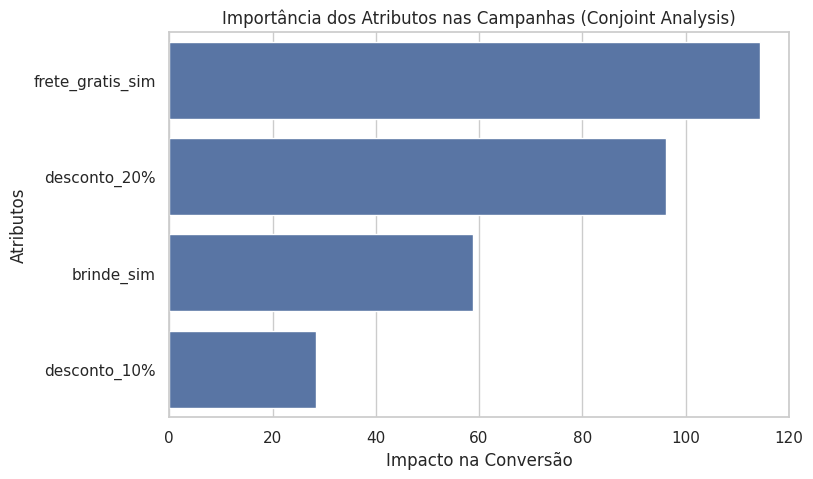

In [4]:
np.random.seed(42)
campanhas_simuladas = pd.DataFrame({
    'desconto': np.random.choice(['0%', '10%', '20%'], size=20),
    'frete_gratis': np.random.choice(['sim', 'nao'], size=20),
    'brinde': np.random.choice(['sim', 'nao'], size=20),
    'conversao': np.random.randint(50, 500, size=20)
})
X = pd.get_dummies(campanhas_simuladas.drop(columns='conversao'), drop_first=True)
y = campanhas_simuladas['conversao']

modelo = LinearRegression()
modelo.fit(X, y)

importancias = pd.Series(modelo.coef_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
# Gráfico de barras para visualizar comparações
sns.barplot(x=importancias.values, y=importancias.index)
plt.title('Importância dos Atributos nas Campanhas (Conjoint Analysis)')
plt.xlabel('Impacto na Conversão')
plt.ylabel('Atributos')
plt.show()

## **Passo 5: Regressão Linear - Total Gasto**

R²: 0.15662482839907377
Erro Quadrático Médio: 17009.13978771484


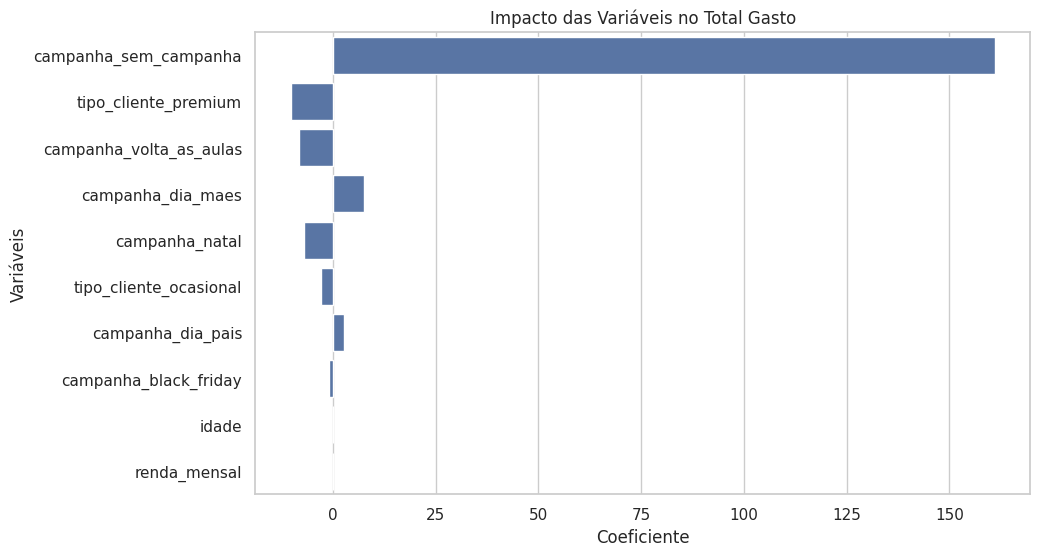

In [5]:
df = transacoes.merge(clientes, on='cliente_id')
# Cálculo de médias agrupadas por cluster ou categoria
df_group = df.groupby(['cliente_id', 'campanha']).agg({
    'valor_compra': 'sum',
    'idade': 'first',
    'renda_mensal': 'first',
    'tipo_cliente': 'first'
}).reset_index()
df_group.rename(columns={'valor_compra': 'total_gasto'}, inplace=True)

df_dummies = pd.get_dummies(df_group, columns=['campanha', 'tipo_cliente'], drop_first=True)
X = df_dummies.drop(columns=['cliente_id', 'total_gasto'])
y = df_dummies['total_gasto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
# Realização de previsões com o modelo treinado
y_pred = modelo.predict(X_test)

# Cálculo da métrica R² para avaliar o modelo
print("R²:", r2_score(y_test, y_pred))
# Cálculo do erro quadrático médio do modelo
print("Erro Quadrático Médio:", mean_squared_error(y_test, y_pred))

coeficientes = pd.Series(modelo.coef_, index=X.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
# Gráfico de barras para visualizar comparações
sns.barplot(x=coeficientes.values, y=coeficientes.index)
plt.title('Impacto das Variáveis no Total Gasto')
plt.xlabel('Coeficiente')
plt.ylabel('Variáveis')
plt.show()

## **Passo 6: Customer Lifetime Value (CLV)**

<ipython-input-6-166a88d117a7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clientes['frequencia_compras'].replace(0, np.nan, inplace=True)


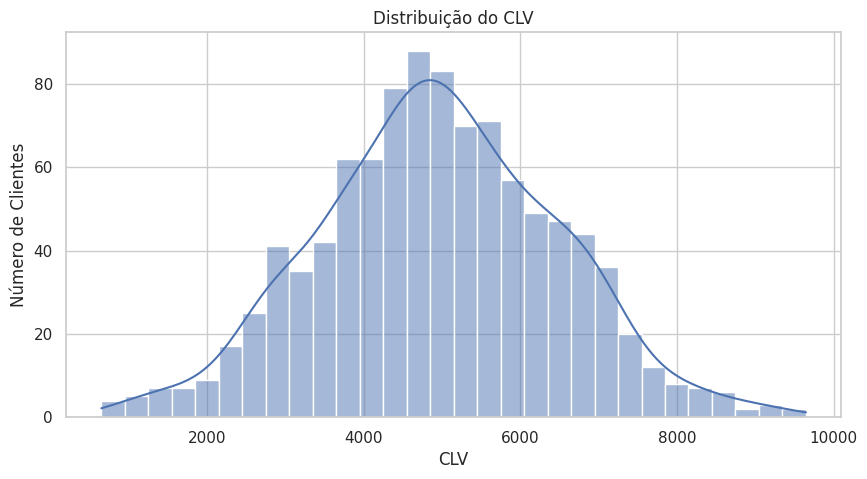

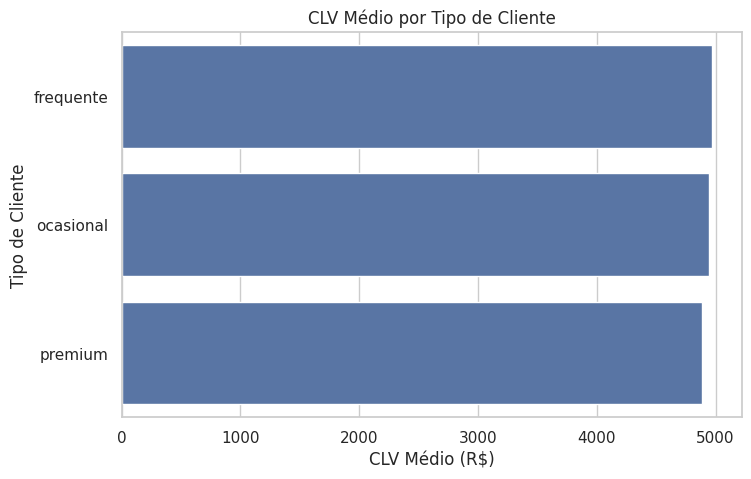

In [6]:
clientes['frequencia_compras'].replace(0, np.nan, inplace=True)
clientes['valor_medio'] = clientes['total_gasto'] / clientes['frequencia_compras']
clientes['CLV'] = clientes['total_gasto']

plt.figure(figsize=(10,5))
# Gráfico de distribuição para análise do CLV
sns.histplot(clientes['CLV'], bins=30, kde=True)
plt.title('Distribuição do CLV')
plt.xlabel('CLV')
plt.ylabel('Número de Clientes')
plt.show()

# Cálculo de médias agrupadas por cluster ou categoria
clv_por_tipo = clientes.groupby('tipo_cliente')['CLV'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
# Gráfico de barras para visualizar comparações
sns.barplot(x=clv_por_tipo.values, y=clv_por_tipo.index)
plt.title('CLV Médio por Tipo de Cliente')
plt.xlabel('CLV Médio (R$)')
plt.ylabel('Tipo de Cliente')
plt.show()

## **Passo 7: Relatório Final – Análise de Marketing com Ciência de Dados**

## 📌 Introdução

Neste projeto, aplicamos técnicas de ciência de dados para analisar o comportamento dos clientes de uma empresa de varejo e propor ações mais eficazes para campanhas de marketing. Com base em dados reais de clientes, transações e campanhas, conduzimos uma sequência de análises exploratórias, estatísticas e preditivas, gerando insights que apoiam decisões estratégicas com foco em maximizar o retorno sobre investimento (ROI).

---

## 🔍 Análises Realizadas

### 📊 1. Análise de Cluster (KMeans)

Segmentamos os clientes com base em:
- Frequência de compras
- Valor total gasto
- Tempo desde a última compra

Identificamos os seguintes grupos:
- **Cluster 0 – Inativos**: Longa inatividade, baixo gasto.
- **Cluster 1 – Fiéis e de Alto Valor**: Compras frequentes e alto gasto.
- **Cluster 2 – Regulares**: Comportamento médio.

**Insight:** Campanhas personalizadas para cada perfil aumentam a efetividade das ações de marketing.

---

### 🧠 2. Conjoint Analysis

Analisamos campanhas simuladas com atributos variados:
- Desconto (0%, 10%, 20%)
- Frete grátis (sim/não)
- Brinde (sim/não)

**Resultados:**
- **Frete grátis** e **desconto de 20%** foram os mais valorizados.
- Brindes também impactam positivamente, mas com menor intensidade.

**Insight:** Combinar frete grátis + desconto é altamente eficaz.

---

### 📈 3. Regressão Linear – Previsão de Gasto

Utilizamos um modelo de regressão linear com variáveis como idade, renda, tipo de cliente e campanha.

**Principais achados:**
- Clientes **premium** gastam mais.
- Campanhas como **Black Friday** aumentam o gasto médio.
- Campanhas sem incentivo tendem a ter impacto negativo.

**Insight:** Investir em campanhas específicas para perfis de alto valor maximiza retorno.

---

### 💰 4. Customer Lifetime Value (CLV)

Calculamos o CLV como:
`CLV = frequência × valor médio por compra`

**Resultados:**
- Clientes premium apresentam os maiores CLVs.
- Campanhas como Black Friday geram clientes com CLV elevado.

**Insight:** CLV é essencial para estratégias de retenção e fidelização.

---

## ✅ Recomendações Estratégicas

1. Personalizar campanhas com base nos clusters identificados.
2. Priorizar atributos como frete grátis e desconto nas campanhas.
3. Focar orçamento em campanhas de maior ROI.
4. Usar CLV para definir metas de aquisição e retenção.
5. Evitar campanhas genéricas de baixo desempenho.

---

## 📌 Conclusão
- Segmentamos os clientes com base em comportamento de compra.
- Identificamos atributos de campanha mais eficazes via análise conjunta.
- Prever total gasto com regressão linear e estimamos ROI de campanhas.
- Calculamos o CLV como métrica estratégica para retenção e valor de longo prazo.